##Imports

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Hvv2vSxj5Z0Ah3xThKAy")
project = rf.workspace("emotion-classification-ngflw").project("emotion-bgjtw")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to EMOTION-1 in yolov8:: 100%|██████████| 4750/4750 [00:00<00:00, 8403.92it/s]


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.1 MB/s eta 0:00:00


In [4]:
import ultralytics
from ultralytics import YOLO
import glob
import os
from IPython.display import Image as IPyImage, display
import albumentations as A
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


##Main Model

In [5]:
model = YOLO('yolov8n.pt', task='detect')

transforms = [
    A.Blur(blur_limit=7, p=0.5),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
    A.CLAHE(clip_limit=4.0, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),
]

results = model.train(data='/content/EMOTION-1/data.yaml', epochs=10, imgsz=640, augmentations=transforms, name='main_model', optimizer='SGD')

Ultralytics 8.3.245 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, augmentations=[Blur(p=0.5, blur_limit=(3, 7)), GaussNoise(p=0.3, mean_range=(0.0, 0.0), noise_scale_factor=1.0, per_channel=True, std_range=(0.2, 0.44)), CLAHE(p=0.5, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8)), RandomBrightnessContrast(p=0.5, brightness_by_max=True, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), ensure_safe_range=False), HueSaturationValue(p=0.5, hue_shift_limit=(-20.0, 20.0), sat_shift_limit=(-30.0, 30.0), val_shift_limit=(-20.0, 20.0))], auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/EMOTION-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=

Argument(s) 'var_limit' are not valid for transform GaussNoise


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

In [6]:
model = YOLO('/content/runs/detect/main_model/weights/best.pt')

val_results = model.val()

Ultralytics 8.3.245 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1639.9±448.6 MB/s, size: 45.6 KB)
val: Scanning /content/EMOTION-1/valid/labels.cache... 198 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 198/198 434.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 4.1it/s 3.1s
                   all        198        197      0.911      0.905      0.947      0.759
                 anger         13         13          1      0.743      0.943      0.814
               disgust         16         16       0.91      0.938      0.965      0.629
                  fear         21         21      0.852      0.905      0.922      0.694
                 happy         50         50          1      0.984      0.995      0.846
               neutral         39         39  

In [7]:
testing = model.predict('/content/EMOTION-1/test/images', save=True, imgsz=640)


image 1/100 /content/EMOTION-1/test/images/00f955a606e601f12232275b9023161656ec362eb06a78e7a33e7e8a-12fffff_jpg.rf.4b4d3cb73d7bfbef1ec38ba85af4054a.jpg: 640x640 2 surprises, 7.2ms
image 2/100 /content/EMOTION-1/test/images/00ff991fffb6c3a88af055392660316634dff862ddaf507492b71cc1f_jpg.rf.59a59c8f779ba25926c571faa8e84735.jpg: 640x640 1 neutral, 7.1ms
image 3/100 /content/EMOTION-1/test/images/0a0a5eb1da66b8516fe28d0a92afa0d689c0205a60f1d69b9ee61f8af_png.rf.b0327e70b5febbc90768696ab48f4c3a.jpg: 640x640 1 neutral, 7.1ms
image 4/100 /content/EMOTION-1/test/images/0a101675358f2ae740eb91522f955cf92f28ad77c49629add154e6de_jpg.rf.96f6a6540fbb21f3b8779938b32b37ab.jpg: 640x640 1 happy, 7.1ms
image 5/100 /content/EMOTION-1/test/images/0a1cb9dfce52e54701de3678ac7ee2b34fc6461bd644f3b3019c14d8_jpg.rf.0dedd19a290628f80220b2f1a42004fb.jpg: 640x640 1 happy, 7.1ms
image 6/100 /content/EMOTION-1/test/images/0a7e9881aa28c043deeaf9e8ab773cfe8b08ef013bf2a7b0ccd4c93c_jpg.rf.f499e2f62247eb5a948fc0e0b66cd49b.j

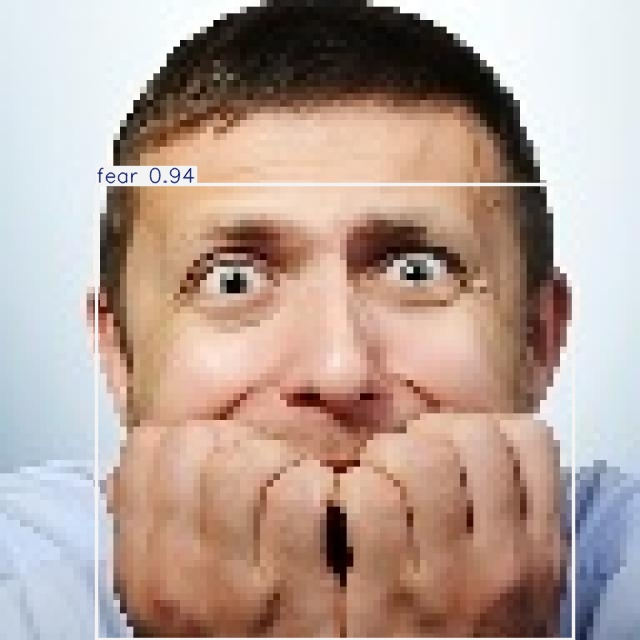

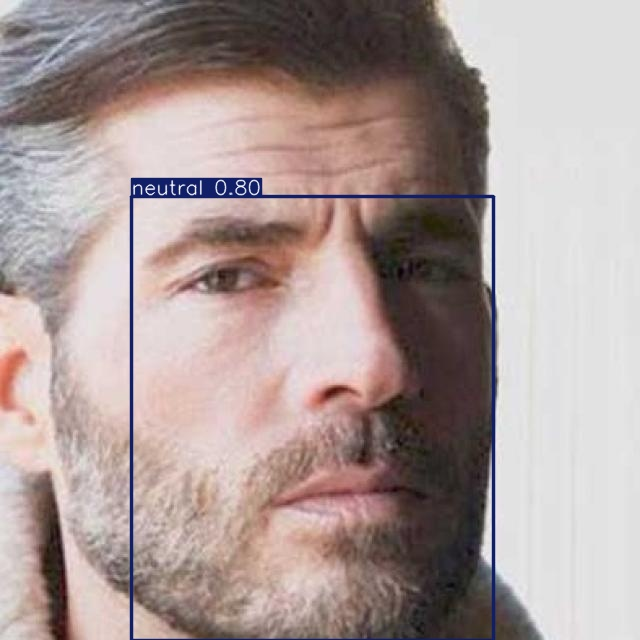

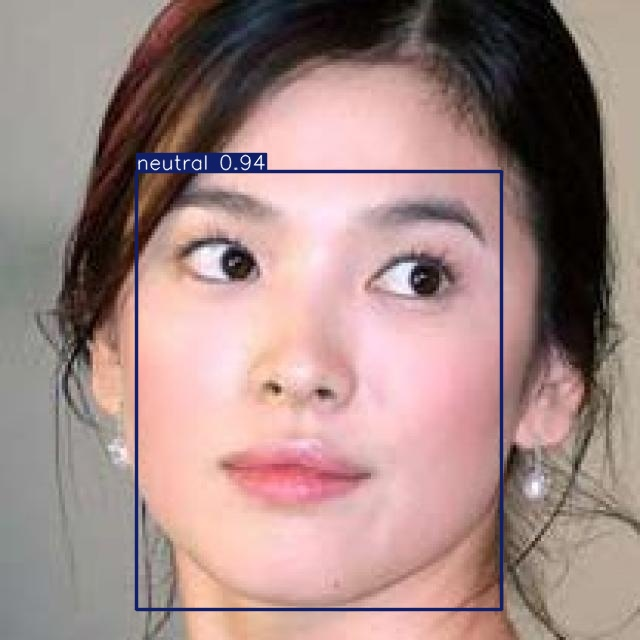

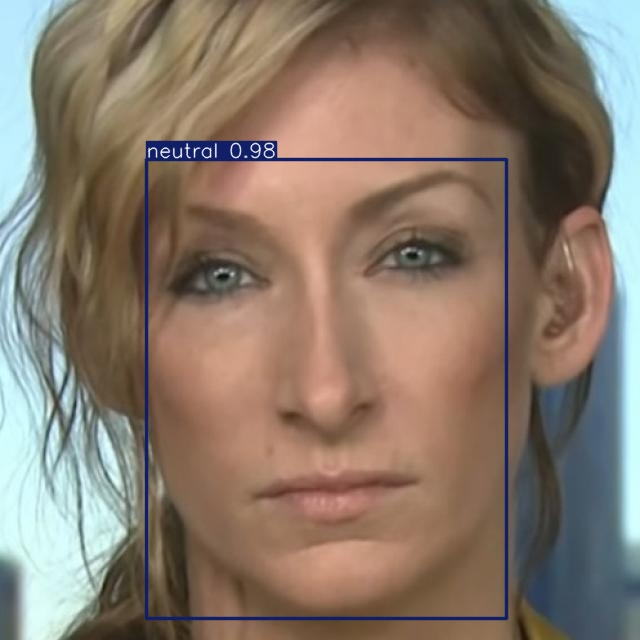

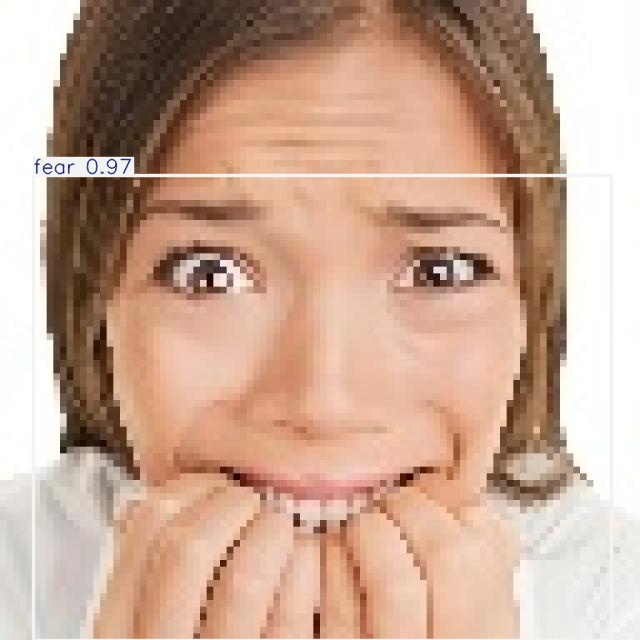

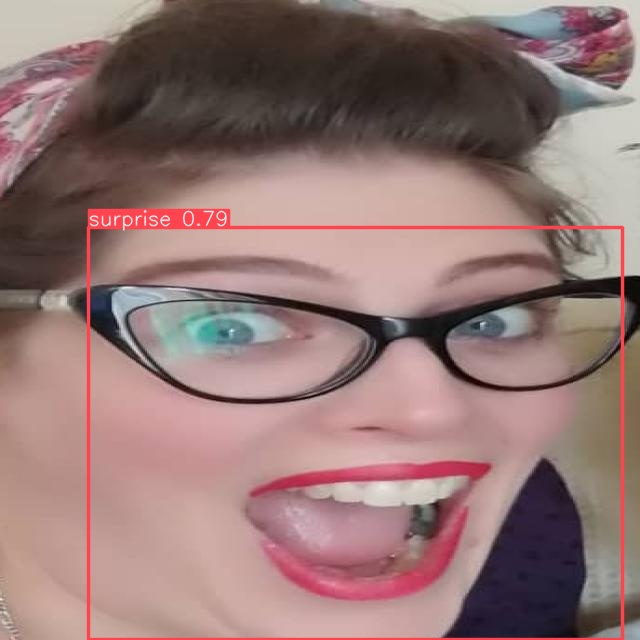

In [8]:
folder = max(glob.glob('/content/runs/detect/predict*/'), key = os.path.getmtime)
for img in glob.glob(f'{folder}/*.jpg')[:6]:
  display(IPyImage(filename = img, width = 500))
  print('\n')